#### Step-1 Loading

In [ ]:
import pandas as pd
import os

paper = pd.read_csv('C:/Users/sahit/Downloads/archive (2)/papers.csv')
paper.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


#### Step-2 Data Cleaning

In [4]:
#remove the colums
paper = paper.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
paper.head()

,year,title,abstract,paper_text
3946,2012,Random function priors for exchangeable arrays...,Abstract Missing,Random function priors for exchangeable arrays...
5991,1992,Global Regularization of Inverse Kinematics fo...,Abstract Missing,Global Regularization of Inverse Kinematics fo...
1371,2002,Concentration Inequalities for the Missing Mas...,Abstract Missing,Concentration Inequalities for the Missing Mas...
7190,1994,Reinforcement Learning Algorithm for Partially...,Abstract Missing,Reinforcement Learning Algorithm for\nPartiall...
5193,2015,Anytime Influence Bounds and the Explosive Beh...,The paper studies transition phenomena in info...,Anytime Influence Bounds and the Explosive\nBe...


In [5]:
import re

# Remove punctuation
paper["paper_text_processed"] = \
paper["paper_text"].apply(lambda x: re.sub(r'[,\.!?]', ' ', x))

# Convert the titles to lowercase
paper["paper_text_processed"] = \
paper["paper_text_processed"].map(lambda x: x.lower())

# Print out the first rows of papers
paper['paper_text_processed'].head()

3946    random function priors for exchangeable arrays...
5991    global regularization of inverse kinematics fo...
1371    concentration inequalities for the missing mas...
7190    reinforcement learning algorithm for\npartiall...
5193    anytime influence bounds and the explosive\nbe...
Name: paper_text_processed, dtype: object

#### Step-3 Exploratory Analysis

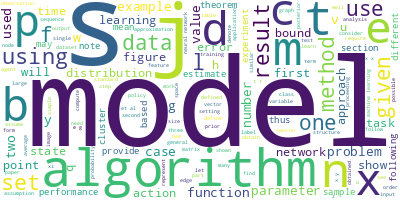

In [6]:
from wordcloud import WordCloud

long_string = ' '.join(list(paper['paper_text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

#### step-4  prepare text for LDA analysis

In [7]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
    
data = paper.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['random', 'function', 'priors', 'exchangeable', 'arrays', 'applications', 'graphs', 'relational', 'data', 'james', 'robert', 'lloyd', 'department', 'engineering', 'university', 'cambridge', 'peter', 'orbanz', 'department', 'statistics', 'columbia', 'university', 'zoubin', 'ghahramani', 'department', 'engineering', 'university', 'cambridge', 'daniel', 'roy']


In [8]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 1), (13, 4), (14, 1), (15, 7), (16, 1), (17, 1), (18, 1), (19, 1), (20, 5), (21, 3), (22, 4), (23, 1), (24, 3), (25, 1), (26, 4), (27, 1), (28, 2), (29, 1)]


#### Step-5 LDA model training

In [9]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.006*"model" + 0.005*"learning" + 0.005*"algorithm" + 0.005*"set" + '
  '0.004*"time" + 0.004*"probability" + 0.004*"data" + 0.004*"one" + '
  '0.003*"error" + 0.003*"problem"'),
 (1,
  '0.007*"model" + 0.006*"learning" + 0.006*"data" + 0.005*"set" + '
  '0.004*"algorithm" + 0.004*"results" + 0.004*"function" + 0.003*"number" + '
  '0.003*"two" + 0.003*"error"'),
 (2,
  '0.007*"data" + 0.007*"algorithm" + 0.006*"model" + 0.005*"using" + '
  '0.004*"learning" + 0.004*"set" + 0.004*"one" + 0.004*"distribution" + '
  '0.004*"time" + 0.004*"problem"'),
 (3,
  '0.006*"data" + 0.005*"model" + 0.005*"set" + 0.005*"time" + '
  '0.005*"algorithm" + 0.004*"learning" + 0.004*"using" + 0.004*"given" + '
  '0.003*"function" + 0.003*"distribution"'),
 (4,
  '0.006*"model" + 0.006*"data" + 0.005*"algorithm" + 0.005*"learning" + '
  '0.005*"using" + 0.004*"distribution" + 0.004*"function" + 0.004*"error" + '
  '0.003*"time" + 0.003*"set"'),
 (5,
  '0.006*"learning" + 0.006*"model" + 0.004*"da

### step-6 Analyse the LDA model results

In [10]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import pickle

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')


LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.010988 -0.005271       1        1  14.796819
4     -0.003044 -0.005616       2        1  12.742405
7     -0.003053 -0.001690       3        1  12.730013
1      0.003341  0.006621       4        1  12.024786
0     -0.003305 -0.005348       5        1   9.832557
2      0.000490  0.003757       6        1   9.243468
5      0.002038  0.003514       7        1   9.058209
8      0.002600  0.002826       8        1   9.055488
9     -0.002478 -0.002226       9        1   5.877800
3     -0.007576  0.003432      10        1   4.638455, topic_info=            Term         Freq        Total Category  logprob  loglift
187         data  1310.000000  1310.000000  Default  30.0000  30.0000
891        using   882.000000   882.000000  Default  29.0000  29.0000
845         time   852.000000   852.000000  Default  28.0000  28.0000
738          set   986.000000   986.000000  Default  27.0000  27.0000
21     algorithm  1195.000000  1195.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
26          also    26.839606   652.257869  Topic10  -6.0306  -0.1198
514       models    25.991824   631.331687  Topic10  -6.0627  -0.1193
85         based    25.505516   637.004113  Topic10  -6.0816  -0.1471
622  probability    24.086409   600.902346  Topic10  -6.1388  -0.1460
305       figure    23.639751   603.417796  Topic10  -6.1575  -0.1689

[854 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
6444       2  0.237828  ackerman
6444       9  0.237828  ackerman
1461       1  0.158023    action
1461       2  0.089689    action
1461       3  0.170835    action
...      ...       ...       ...
14852      4  0.090739       ztu
14852      5  0.090739       ztu
14852      6  0.090739       ztu
14852      7  0.090739       ztu
14852      8  0.090739       ztu

[3933 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 8, 2, 1, 3, 6, 9, 10, 4])